In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.model_selection import StratifiedShuffleSplit
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# importing data

In [2]:
''' 1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's'''
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
           'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

" 1. CRIM      per capita crime rate by town\n    2. ZN        proportion of residential land zoned for lots over \n                 25,000 sq.ft.\n    3. INDUS     proportion of non-retail business acres per town\n    4. CHAS      Charles River dummy variable (= 1 if tract bounds \n                 river; 0 otherwise)\n    5. NOX       nitric oxides concentration (parts per 10 million)\n    6. RM        average number of rooms per dwelling\n    7. AGE       proportion of owner-occupied units built prior to 1940\n    8. DIS       weighted distances to five Boston employment centres\n    9. RAD       index of accessibility to radial highways\n    10. TAX      full-value property-tax rate per $10,000\n    11. PTRATIO  pupil-teacher ratio by town\n    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks \n                 by town\n    13. LSTAT    % lower status of the population\n    14. MEDV     Median value of owner-occupied homes in $1000's"

In [3]:
# importing dataset
housing = pd.read_csv('housing.data.txt', sep="\s+", header=None, names = columns)
housing.head(5)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [4]:
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state=42)

In [6]:
train_set.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean     3.609125   11.569307   10.985050    0.071782    0.556484    6.315891   
std      8.875058   23.152481    6.894618    0.258447    0.117704    0.709452   
min      0.009060    0.000000    0.740000    0.000000    0.385000    3.863000   
25%      0.081437    0.000000    5.130000    0.000000    0.452000    5.890500   
50%      0.261390    0.000000    8.560000    0.000000    0.538000    6.210000   
75%      3.202962   20.000000   18.100000    0.000000    0.631000    6.636750   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean    68.556436    3.808195    9.356436  404.032178   18.318317  356.278342   
std     27.994922    2.131226    8.589721  166.172655    2.228701   91.566533   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.550000    2.087875    4.000000  279.000000   16.800000  375.472500   
50%     77.700000    3.175750    5.000000  330.000000   18.700000  391.305000   
75%     93.650000    5.400800   12.000000  666.000000   20.200000  395.755000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  404.000000  404.000000  
mean    12.457351   22.796535  
std      7.110381    9.332147  
min      1.730000    5.000000  
25%      6.772500   16.950000  
50%     10.925000   21.600000  
75%     16.372500   26.400000  
max     37.970000   50.000000

# standardization

In [5]:
train_stand= pd.DataFrame(scale(train_set), columns=columns)

In [8]:
train_stand.mean()

CRIM      -4.699211e-17
ZN         8.354153e-17
INDUS     -8.656442e-18
CHAS      -6.732788e-17
NOX       -5.090812e-16
RM        -2.741207e-16
AGE       -4.858600e-16
DIS        4.919057e-17
RAD       -9.041173e-17
TAX       -1.534457e-16
PTRATIO    8.249727e-16
B         -5.155392e-16
LSTAT     -1.648846e-16
MEDV       3.484561e-16
dtype: float64

In [9]:
train_stand.std()

CRIM       1.00124
ZN         1.00124
INDUS      1.00124
CHAS       1.00124
NOX        1.00124
RM         1.00124
AGE        1.00124
DIS        1.00124
RAD        1.00124
TAX        1.00124
PTRATIO    1.00124
B          1.00124
LSTAT      1.00124
MEDV       1.00124
dtype: float64

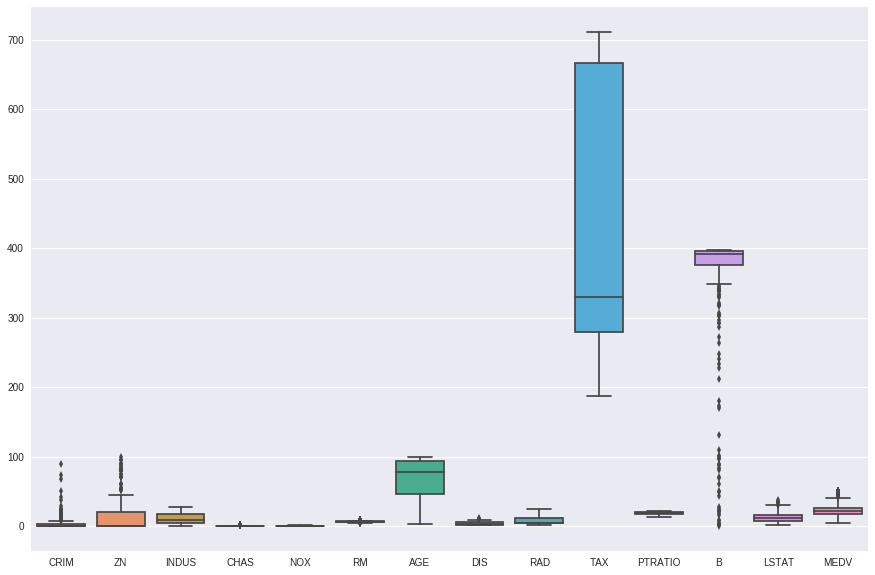

In [52]:
x = plt.figure(figsize=(15,10))
x =sns.boxplot(data=train_set)

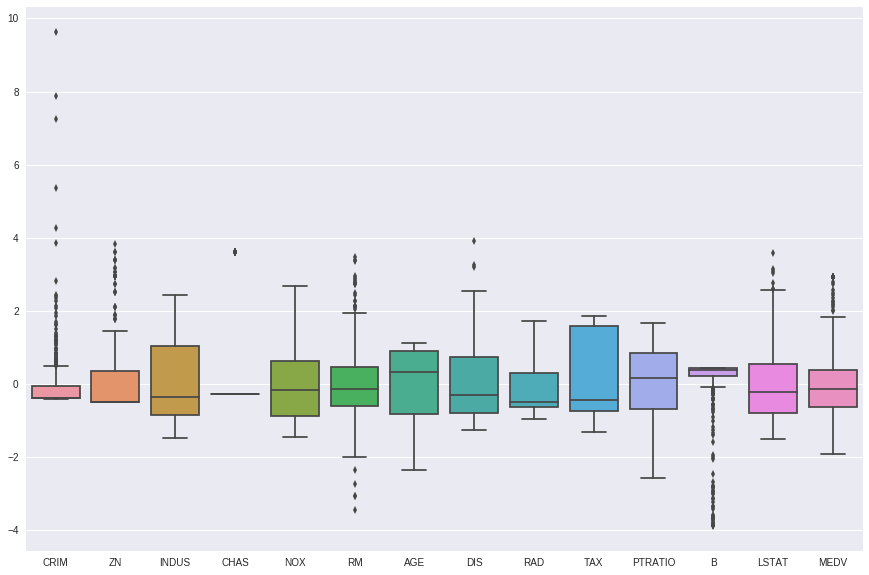

In [53]:
x= plt.figure(figsize=(15,10))
x= sns.boxplot(data=train_stand)

In [12]:
x = plt.figure(figsize=(15,10))
x =sns.swarmplot(data=train_stand)

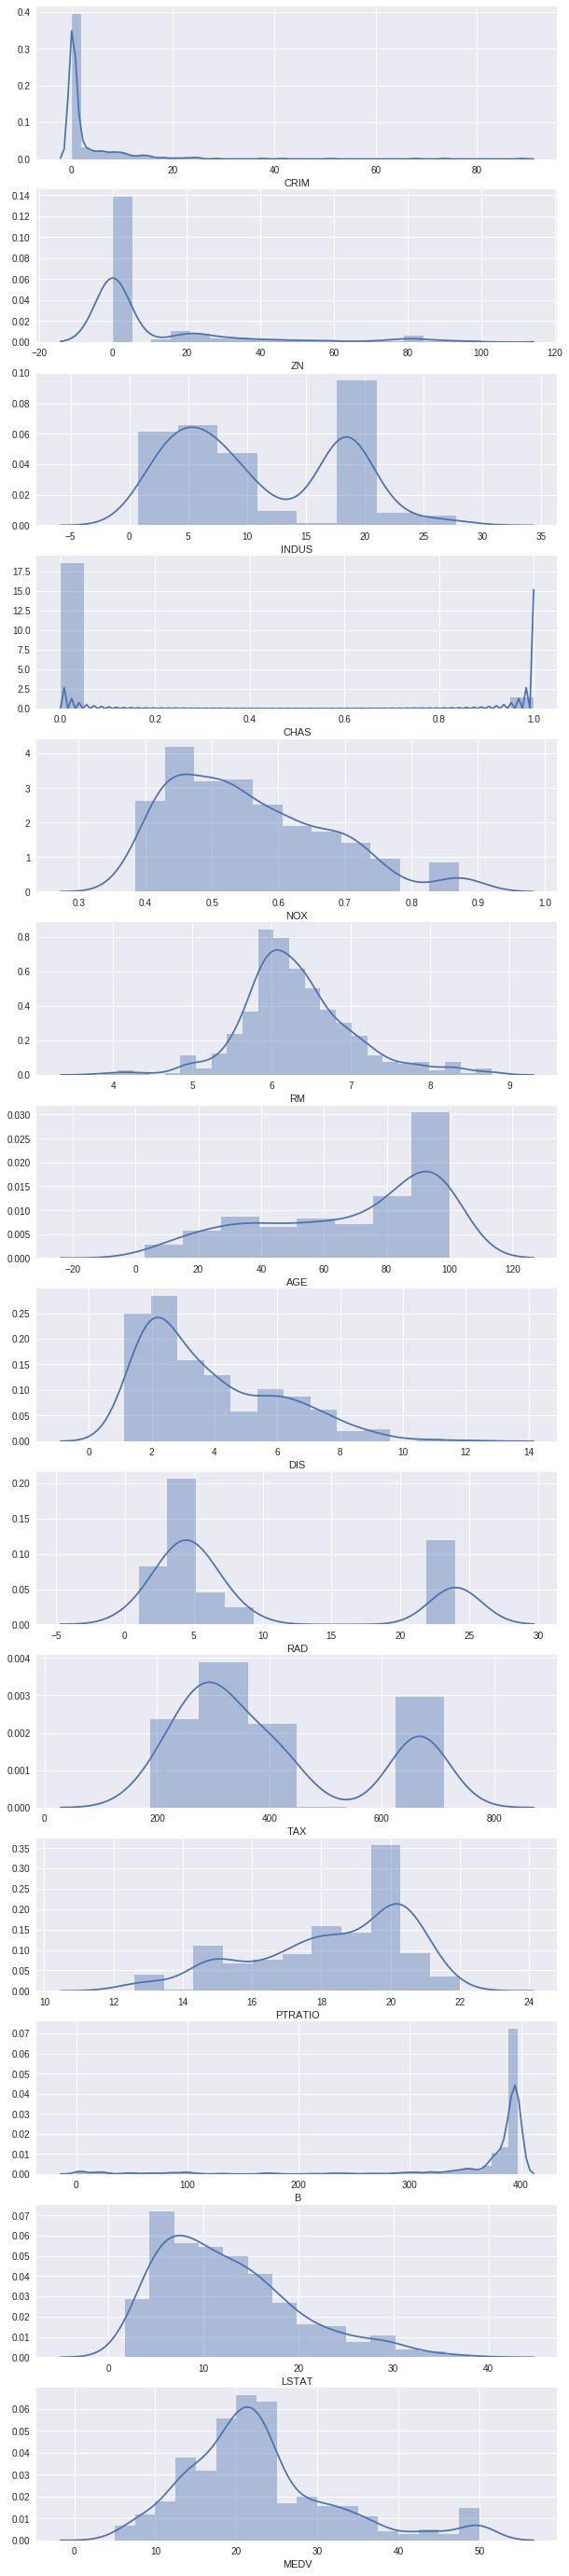

In [14]:
f, ax = plt.subplots(14, figsize=(10,50))
i = 0
for x in housing.columns:
    x1 = sns.distplot(train_set[x], ax= ax[i])
    i += 1

In [15]:
x = plt.figure(figsize=(15,10))
x = sns.heatmap(abs(train_set.corr()), annot=True,linewidths=.2,cmap='Accent_r')

In [54]:
x = plt.Figure(figsize=(10,10))
x= sns.lmplot('TAX', 'RAD', data= train_stand)

In [50]:
# from sklearn.svm import OneClassSVM
# outlier = OneClassSVM(random_state=42)
# outlier.fit(train_set)
# x1 = outlier.predict(train_set)

# train = train_set.groupby(x1)

# x2 = train.get_group(1)

# sns.lmplot('RAD', 'TAX', x2)

# plt.figure(figsize=(15, 10))

# sns.boxplot(data= pd.DataFrame(scale(x2), columns=housing.columns))

# comparing StratifiedShuffleSplit and train_test_split

In [60]:
Dis_cat = housing['DIS']//1

Dis_cat[Dis_cat>=8]=8 

Dis_cat.unique()

Dis_cat.value_counts()

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for training_indices, test_indices in split.split(housing, Dis_cat):
    stratified_train_set = housing.loc[training_indices]
    stratified_test_set = housing.loc[test_indices]

In [66]:
stratified_train_set.shape
stratified_test_set.shape

(404, 14)

(102, 14)

In [67]:
h = housing.groupby(Dis_cat).size() / len(housing)

In [68]:
h.name='housing'

In [69]:
str_test = stratified_test_set.groupby(Dis_cat).size() / len(stratified_test_set)
ran_test = test_set.groupby(Dis_cat).size() / len(test_set)
str_test.name = 'stratified test'
ran_test.name = 'random test'
compare = pd.concat([h, str_test, ran_test], axis=1)

In [70]:
compare['stratified test %'] = 100 * (compare['stratified test'] - compare['housing']) / compare['housing']
compare['random test %'] = 100 * (compare['random test'] - compare['housing']) / compare['housing']

In [71]:
compare

housing  stratified test  random test  stratified test %  random test %
DIS                                                                          
1.0  0.221344         0.225490     0.205882           1.873249      -6.985294
2.0  0.252964         0.254902     0.245098           0.765931      -3.109681
3.0  0.150198         0.147059     0.156863          -2.089783       4.437564
4.0  0.108696         0.107843     0.156863          -0.784314      44.313725
5.0  0.094862         0.098039     0.127451           3.349673      34.354575
6.0  0.075099         0.078431     0.039216           4.437564     -47.781218
7.0  0.053360         0.049020     0.019608          -8.133624     -63.253450
8.0  0.043478         0.039216     0.049020          -9.803922      12.745098

In [18]:
def split_feature_target(df):
    features = df.drop('MEDV', axis=1)
    target = df['MEDV']
    return features, target

In [19]:
features, target = split_feature_target(train_set)

In [20]:
def columns(x):
    return x.values
column_selector = FunctionTransformer(func=columns, validate=False)

# linear regression

In [75]:
lin_reg = LinearRegression()

lin_pipe = make_pipeline(column_selector, StandardScaler(), lin_reg)

lin_pip = lin_pipe.fit(features, target)
np.sqrt(mean_squared_error(target,lin_pipe.predict(features)))

4.6520331848801675

In [22]:
pre_target= lin_pip.predict(features)

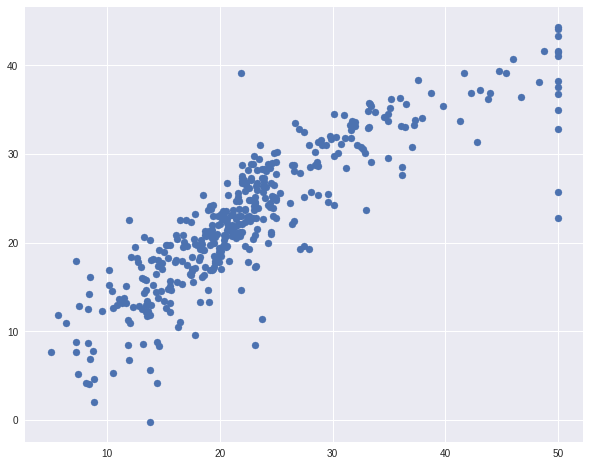

In [23]:
X = plt.figure(figsize=(10, 8))
x =plt.scatter(target, pre_target)

# Decision Tree Regression

In [26]:
dt_reg_pipe = make_pipeline(column_selector, StandardScaler(), DecisionTreeRegressor())

In [74]:
x =dt_reg_pipe.fit(features, target)

dt_pre = dt_reg_pipe.predict(features)

np.sqrt(mean_squared_error(target, dt_pre))

0.0

In [28]:
x = plt.figure(figsize=(8, 8))
x = plt.scatter(target, dt_pre)

# Random forest regression

In [73]:
rf_reg_pipe = make_pipeline(column_selector, StandardScaler(), RandomForestRegressor(random_state=42))

x=rf_reg_pipe.fit(features, target)

rf_pre = rf_reg_pipe.predict(features)

np.sqrt(mean_squared_error(rf_pre, target))

1.6293863875704866

In [31]:
x = plt.figure(figsize=(10, 8))
x = plt.scatter(target, rf_pre, alpha=0.4)

# cross validation

### linear regression

In [34]:
pre = cross_val_predict(LinearRegression(), features,target, cv=5, n_jobs=4)
np.sqrt(mean_squared_error(target, pre))

4.863837941861209

In [35]:
x = plt.figure(figsize=(10, 8))
x = plt.scatter(target,pre)

### random forest

In [192]:
re = RandomForestRegressor(random_state=42)
pre = cross_val_predict(re, features, target, cv=5, n_jobs=4)
np.sqrt(mean_squared_error(target, pre))

4.124802845573529

# using Grid search cv

In [38]:
rf_reg1 = make_pipeline(column_selector,StandardScaler(), RandomForestRegressor(random_state=42))

grid_params = [{'randomforestregressor__n_estimators': [80, 90, 100],
                'randomforestregressor__max_features': [5, 6, 7, 8]}]


gs_rf = GridSearchCV(rf_reg1,grid_params, cv=5, scoring='neg_mean_squared_error', n_jobs=4 )

In [40]:
x= gs_rf.fit(features, target)

In [41]:
gs_rf.best_params_

{'randomforestregressor__max_features': 6,
 'randomforestregressor__n_estimators': 90}

In [42]:
pre = gs_rf.predict(features)

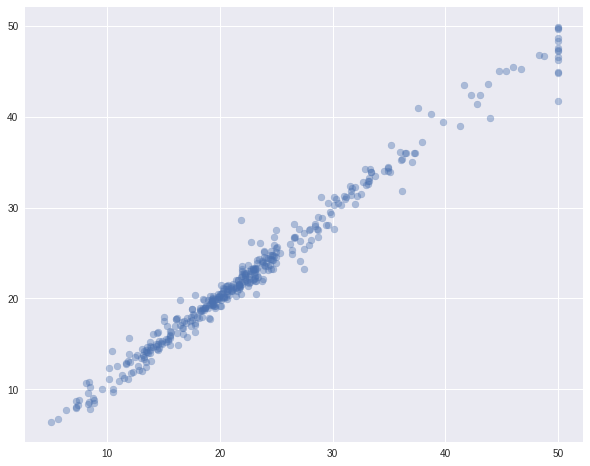

In [43]:
x = plt.figure(figsize=(10, 8))
x = plt.scatter(target, pre, alpha=0.4)

In [203]:
np.sqrt(mean_squared_error(target,pre))

1.2760438850515414

# using Random search cv

In [44]:
param_distribs = {'randomforestregressor__n_estimators': randint(low=1, high=200),
                  'randomforestregressor__max_features': randint(low=1, high=10)}

In [45]:
rf_reg2 = make_pipeline(column_selector, StandardScaler(), RandomForestRegressor(random_state=42))

rs_cv = RandomizedSearchCV(estimator= rf_reg2, param_distributions=param_distribs, n_iter=20, 
                           cv=5,n_jobs = 4, random_state=42,scoring='neg_mean_squared_error')

x = rs_cv.fit(features, target)

In [46]:
rs_cv.best_params_

{'randomforestregressor__max_features': 6,
 'randomforestregressor__n_estimators': 89}

In [47]:
pre  = rs_cv.predict(features)

In [48]:
np.sqrt(mean_squared_error(target,pre))

1.274849053544037

In [49]:
x = plt.figure(figsize=(10, 8))
x = plt.scatter(target, pre, alpha=0.4)